In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('NewsPaperData.csv')

In [4]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [5]:
data.shape

(34, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [9]:
data.isnull().sum()  #Null Values

Newspaper    0
daily        0
sunday       0
dtype: int64

data.duplicated() # Duplicate Values

# Data Visualization


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily'>

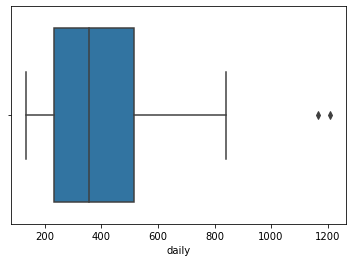

In [12]:
sns.boxplot(data['daily'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sunday'>

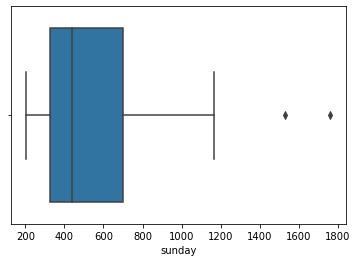

In [13]:
sns.boxplot(data['sunday'])

<AxesSubplot:>

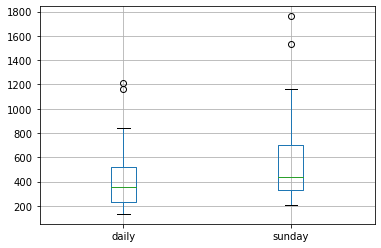

In [14]:
data.boxplot()

In [17]:
data = data[data.daily < 1000]

In [18]:
data.shape

(32, 3)

In [19]:
##we did univariate Analysis


In [20]:
## Bi Variate Analysis

<AxesSubplot:xlabel='daily', ylabel='sunday'>

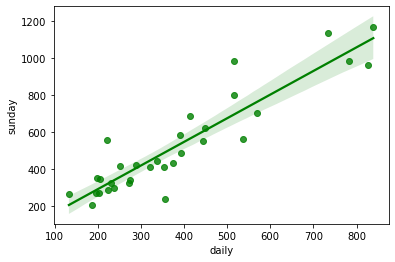

In [26]:
sns.regplot(x='daily', y='sunday', data = data, color = 'g')

# Correlation

In [33]:
corr = data.corr()
corr

,daily,sunday
daily,1.000000,0.917674
sunday,0.917674,1.000000


<AxesSubplot:>

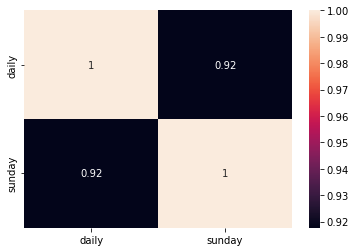

In [35]:
sns.heatmap(corr ,annot = True)

# Fitting a Regression Line

1. statemodel lib call OLS lib
2. Test out Model

In [37]:
data.head(3)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084


In [36]:
import statsmodels.formula.api as smf

In [38]:
model = smf.ols("sunday~daily", data = data).fit()  #ols=ordinary least square

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.48e-13
Time:                        17:21:15   Log-Likelihood:                -194.66
No. Observations:                  32   AIC:                             393.3
Df Residuals:                      30   BIC:                             396.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8956     43.332      0.805      0.427     -53.599     123.391
daily          1.2778      0.101     12.650      0.000       1.072       1.484
==============================================================================
Omnibus:                        4.745   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                3.263
Skew:                           0.545   Prob(JB):                        0.196
Kurtosis:                       4.122   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.params

Intercept    34.895607
daily         1.277835
dtype: float64

In [41]:
newdata=pd.Series([200,300])   #Predict for 200 and 300 daily circulation

In [42]:
data_pred = pd.DataFrame(newdata,columns=['daily'])

In [44]:
model.predict(data_pred)

0    290.462652
1    418.246175
dtype: float64